In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#https://www.kaggle.com/datasets/ishaanv/ISLR-Auto?resource=download&select=Income2.csv

In [71]:
df = pd.read_csv("Income2.csv",na_values="?")
df.dropna(inplace=True)
df
# , index_col="mpg"

,Unnamed: 0,Education,Seniority,Income
0,1,21.586207,113.103448,99.917173
1,2,18.275862,119.310345,92.579135
2,3,12.068966,100.689655,34.678727
3,4,17.034483,187.586207,78.702806
4,5,19.931034,20.000000,68.009922
5,6,18.275862,26.206897,71.504485
6,7,19.931034,150.344828,87.970467
7,8,21.172414,82.068966,79.811030
8,9,20.344828,88.275862,90.006327
9,10,10.000000,113.103448,45.655529


In [72]:
df.describe()

,Unnamed: 0,Education,Seniority,Income
count,30.000000,30.000000,30.000000,30.000000
mean,15.500000,16.386207,93.862069,62.744733
std,8.803408,3.810622,55.715623,27.013285
min,1.000000,10.000000,20.000000,17.613593
25%,8.250000,12.482759,44.827586,36.392043
50%,15.500000,17.034483,94.482759,70.804791
75%,22.750000,19.931034,133.275862,85.930608
max,30.000000,21.586207,187.586207,99.917173


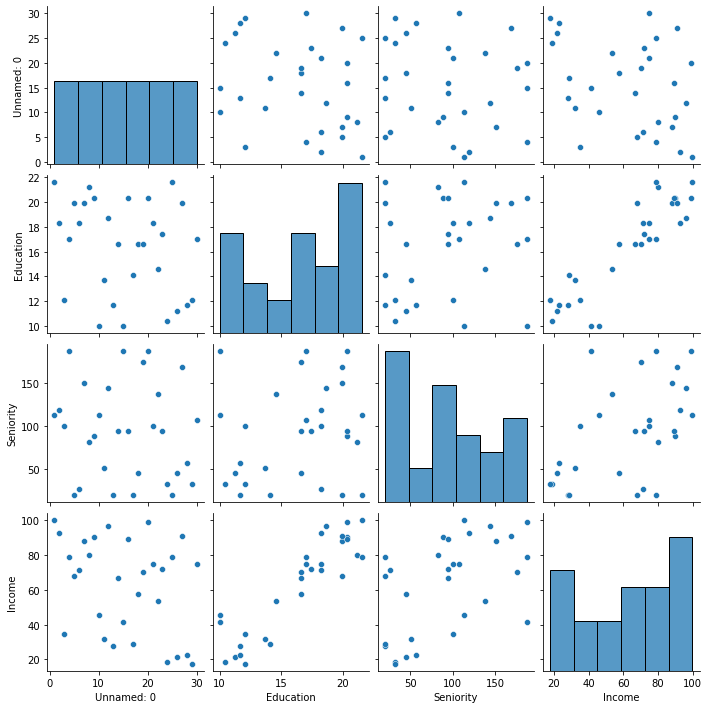

In [73]:
p = sns.pairplot(df)
p.savefig("plots.svg")
p

# LINEARITY

## reset


In [2]:
from statsmodels.stats.diagnostic import linear_reset

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


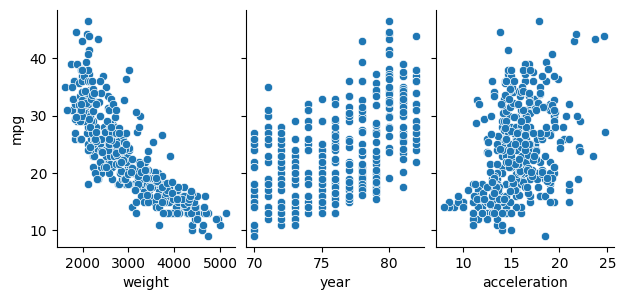

In [76]:
p = sns.pairplot(df, x_vars=['weight','year','acceleration'], y_vars='mpg', size=3, aspect=0.7)

In [6]:
df[['weight','year','acceleration']].corr()

,weight,year,acceleration
weight,1.000000,-0.309120,-0.416839
year,-0.309120,1.000000,0.290316
acceleration,-0.416839,0.290316,1.000000


In [74]:
df.columns

Index(['Unnamed: 0', 'Education', 'Seniority', 'Income'], dtype='object')

In [87]:
x=df.drop(["Income","Unnamed: 0"],axis=1)
y=df.Income

In [8]:
df["horsepower"].astype(int)

0      130
1      165
2      150
3      150
4      140
      ... 
392     86
393     52
394     84
395     79
396     82
Name: horsepower, Length: 392, dtype: int32

In [88]:
df.dtypes

Unnamed: 0      int64
Education     float64
Seniority     float64
Income        float64
dtype: object

In [89]:
x

,Education,Seniority
0,21.586207,113.103448
1,18.275862,119.310345
2,12.068966,100.689655
3,17.034483,187.586207
4,19.931034,20.000000
5,18.275862,26.206897
6,19.931034,150.344828
7,21.172414,82.068966
8,20.344828,88.275862
9,10.000000,113.103448


In [90]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

In [92]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

regr = LinearRegression().fit(X_train,y_train)
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)

In [93]:
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.9285723797971353


In [94]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -1.3564906773601913e-14


# Check for Homoscdasticity

C:\Users\zereb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\zereb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


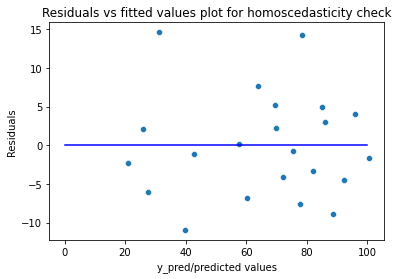

In [100]:
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
#plt.ylim(-10,10)
#plt.xlim(0,26)
p = sns.lineplot([0,100],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [101]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statistic', 1.1625409298368512), ('p-value', 0.4130777856443419)]

In [ ]:
# p-value > 0.05 => Residuals are Homoscedascity

# DW
    

In [102]:
from statsmodels.stats.stattools import durbin_watson

In [103]:
dw=durbin_watson(residuals)
print(dw)
#DW statistic e <0,4>
r=1-dw/2 #r -pearson
print(r)

2.31675764315101
-0.1583788215755051


# Check for Normality of residuals

C:\Users\zereb\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


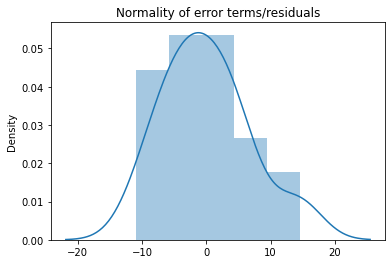

In [104]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

In [105]:
from statsmodels.stats.stattools import jarque_bera

In [106]:
jb,jbpval,skew,kurtosis=jarque_bera(residuals)
jbpval
# ma rozkladu normalnego

0.5508647837847758

# Autocorrelation of residuals

C:\Users\zereb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\zereb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


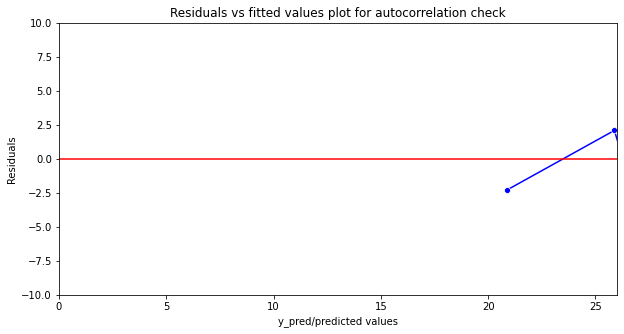

In [107]:
plt.figure(figsize=(10,5))
p = sns.lineplot(y_pred,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

In [104]:
import statsmodels.api as sm

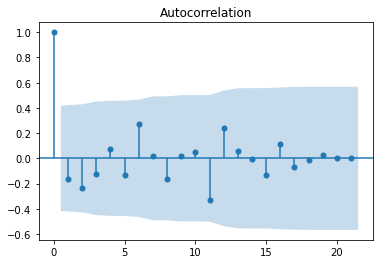

In [112]:
sm.graphics.tsa.plot_acf(residuals, lags=21)
plt.show()

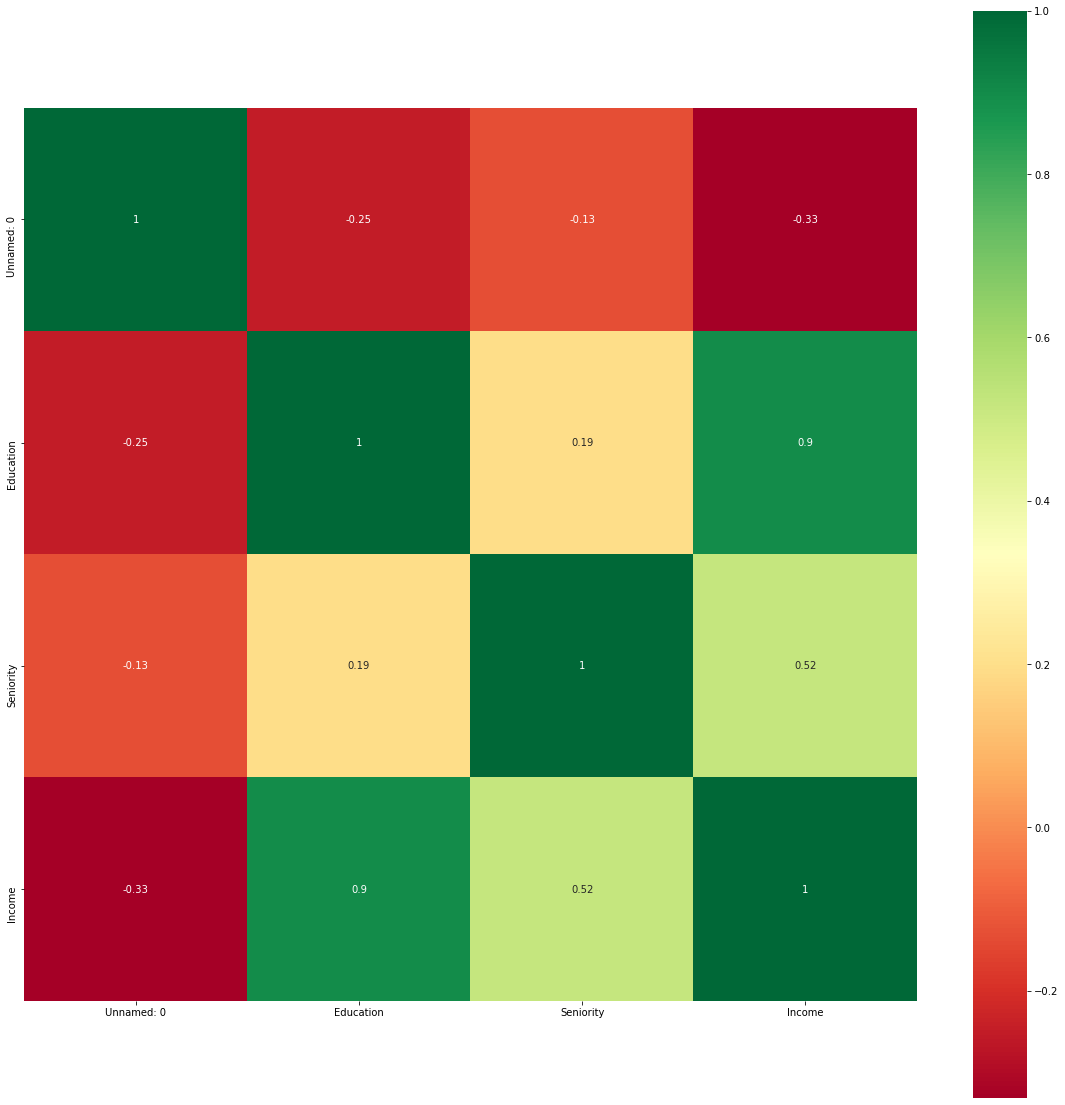

In [113]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap